Problem of the Statement:
    To predict this years Dutch Grand Prix Results

Making Use of last year's Formula One Results, can we predict the outcome of this year's event in the Netherlands? 
    Dataset: 2022 Formula One Results - 2022F1Race.csv

In [23]:
# importing the relevant libraries

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from datetime import datetime;
from datetime import date

# libraries for machine learning 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

In [24]:
# First I extract the csv data into a dataframe using Pandas

race_results = pd.read_csv(r'/home/jeromemugita/Documents/Code/DataScience/Intermediate DS/Project/2022F1Race.csv')
race_results

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
0,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,1:34.570
1,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,1:35.740
2,Bahrain,3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,1:36.228
3,Bahrain,4,63,George Russell,Mercedes,9,57,+11.211,12,No,1:36.302
4,Bahrain,5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,1:36.623
...,...,...,...,...,...,...,...,...,...,...,...
435,Abu Dhabi,16,47,Mick Schumacher,Haas Ferrari,12,57,+1 lap,0,No,1:29.833
436,Abu Dhabi,17,20,Kevin Magnussen,Haas Ferrari,16,57,+1 lap,0,No,1:31.158
437,Abu Dhabi,18,44,Lewis Hamilton,Mercedes,5,55,DNF,0,No,1:29.788
438,Abu Dhabi,19,6,Nicholas Latifi,Williams Mercedes,20,55,DNF,0,No,1:30.309


In [25]:
# Right from the start, I can tell that the Times and Car Numbers will not be of use in the prediction so i get rid of the columns

race_results = race_results.drop(columns=['Time/Retired', 'Fastest Lap', 'No'])
race_results

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
0,Bahrain,1,Charles Leclerc,Ferrari,1,57,26,Yes
1,Bahrain,2,Carlos Sainz,Ferrari,3,57,18,No
2,Bahrain,3,Lewis Hamilton,Mercedes,5,57,15,No
3,Bahrain,4,George Russell,Mercedes,9,57,12,No
4,Bahrain,5,Kevin Magnussen,Haas Ferrari,7,57,10,No
...,...,...,...,...,...,...,...,...
435,Abu Dhabi,16,Mick Schumacher,Haas Ferrari,12,57,0,No
436,Abu Dhabi,17,Kevin Magnussen,Haas Ferrari,16,57,0,No
437,Abu Dhabi,18,Lewis Hamilton,Mercedes,5,55,0,No
438,Abu Dhabi,19,Nicholas Latifi,Williams Mercedes,20,55,0,No


In [26]:
# I then check the datatypes for the purposes of context

race_results.dtypes

Track            object
Position         object
Driver           object
Team             object
Starting Grid     int64
Laps              int64
Points            int64
+1 Pt            object
dtype: object

In [27]:
# Then I check for null values in the DF

race_results.isna().sum()

Track            0
Position         0
Driver           0
Team             0
Starting Grid    0
Laps             0
Points           0
+1 Pt            0
dtype: int64

Since most of my data is in string format, I would rather it changed into numbers for better inpact in the prediction. I will provide
a documentation for the values changed to assist in the interpretation further. 

In [28]:
# I check for the unique values in the Track column to establish the different tracks in the Formula one pool.

race_results['Track'].unique()

array(['Bahrain', 'Saudi Arabia', 'Australia', 'Emilia Romagna', 'Miami',
       'Spain', 'Monaco', 'Azerbaijan', 'Canada', 'Great Britain',
       'Austria', 'France', 'Hungary', 'Belgium', 'Netherlands', 'Italy',
       'Singapore', 'Japan', 'United States', 'Mexico', 'Brazil',
       'Abu Dhabi'], dtype=object)

In the following function I use the unique Track labels established above to index the entries according to the order of occurence. Here is the 
appropriate documentation: 

Documentation:
-----------------
1. Bahrain
2. Saudi Arabia
3. Australia
4. Emilia Romagna
5. Miam
6. Spain
7. Monaco
8. Azerbaijan
9. Canada
10. Great Britai
11. Austria
12. France
13. Hungary
14. Belgium
15. Netherlands
16. Italy
17. Singapore
18. Japan
19. United States
20. Mexico
21. Brazil
22. Abu Dhab


In [29]:
def change_track_names(df): 
    
    """
    Description:
    ------------
    To change the track name to index values in order of occurence 
    
    Parameters:
    -----------
    df: (DataFrame) - DataFrame containing the track names
    
    Returns:
    --------
    df: (DataFrame) - DataFrame containing changes made to 'Track' column
    
    """
    
    tracks = df['Track'].unique()
    track_map = {pos: index + 1 for index, pos in enumerate(tracks)}
    
    df['Track'] = df['Track'].map(track_map)
    return df


change_track_names(race_results)

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
0,1,1,Charles Leclerc,Ferrari,1,57,26,Yes
1,1,2,Carlos Sainz,Ferrari,3,57,18,No
2,1,3,Lewis Hamilton,Mercedes,5,57,15,No
3,1,4,George Russell,Mercedes,9,57,12,No
4,1,5,Kevin Magnussen,Haas Ferrari,7,57,10,No
...,...,...,...,...,...,...,...,...
435,22,16,Mick Schumacher,Haas Ferrari,12,57,0,No
436,22,17,Kevin Magnussen,Haas Ferrari,16,57,0,No
437,22,18,Lewis Hamilton,Mercedes,5,55,0,No
438,22,19,Nicholas Latifi,Williams Mercedes,20,55,0,No


In [30]:
# Here I want to establish the different drivers in the Formula One competition

race_results['Driver'].unique()

array(['Charles Leclerc', 'Carlos Sainz', 'Lewis Hamilton',
       'George Russell', 'Kevin Magnussen', 'Valtteri Bottas',
       'Esteban Ocon', 'Yuki Tsunoda', 'Fernando Alonso', 'Guanyu Zhou',
       'Mick Schumacher', 'Lance Stroll', 'Alexander Albon',
       'Daniel Ricciardo', 'Lando Norris', 'Nicholas Latifi',
       'Nico Hulkenberg', 'Sergio Perez', 'Max Verstappen',
       'Pierre Gasly', 'Sebastian Vettel', 'Nyck De Vries'], dtype=object)

The function below replaces the driver names with integers from index 1 to the nth driver. Below, I have provided a documentation to allow easy 
intepretation of the DataFrame entries. 

Documentation:
---------------
1. Charles Leclerc
2. Carlos Sainz
3. Lewis Hamilton
4. George Russell
5. Kevin Magnussen
6. Valtteri Bottas
7. Esteban Ocon
8. Yuki Tsunoda
9. Fernando Alonso
10. Guanyu Zhou
11. Mick Schumacher
12. Lance Stroll
13. Alexander Albon
14. Daniel Ricciardo
15. Lando Norris
16. Nicholas Latifi
17. Nico Hulkenberg
18. Sergio Perez
19. Max Verstappen
20. Pierre Gasly
21. Sebastian Vettel
22. Nyck De Vrie

In [31]:
def change_driver_names(df): 
    
    """
    Description:
    ------------
    To change the driver name to index values in order of occurence 
    
    Parameters:
    -----------
    df: (DataFrame) - DataFrame containing the driver names
    
    Returns:
    --------
    df: (DataFrame) - DataFrame containing changes made to 'Driver' column
    
    """
    
    drivers = df['Driver'].unique()
    driver_map = {pos: index + 1 for index, pos in enumerate(drivers)}
    
    df['Driver'] = df['Driver'].map(driver_map)
    return df

change_driver_names(race_results)

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
0,1,1,1,Ferrari,1,57,26,Yes
1,1,2,2,Ferrari,3,57,18,No
2,1,3,3,Mercedes,5,57,15,No
3,1,4,4,Mercedes,9,57,12,No
4,1,5,5,Haas Ferrari,7,57,10,No
...,...,...,...,...,...,...,...,...
435,22,16,11,Haas Ferrari,12,57,0,No
436,22,17,5,Haas Ferrari,16,57,0,No
437,22,18,3,Mercedes,5,55,0,No
438,22,19,16,Williams Mercedes,20,55,0,No


In [32]:
# Here I am trying to establish the different teams in the competions since it plays a part in the outcome

race_results['Team'].unique()

array(['Ferrari', 'Mercedes', 'Haas Ferrari', 'Alfa Romeo Ferrari',
       'Alpine Renault', 'AlphaTauri RBPT',
       'Aston Martin Aramco Mercedes', 'Williams Mercedes',
       'McLaren Mercedes', 'Red Bull Racing RBPT'], dtype=object)

The function below replaces the different team with integers from index 1 to the nth team. Below, I have provided a documentation to allow easy intepretation of the DataFrame entries. 

Documentation:
---------------
1. Ferrari
2. Mercedes
3. Haas Ferrari
4. Alfa Romeo Ferrari
5. Alpine Renault
6. AlphaTauri RBPT
7. Aston Martin Aramco Mercedes
8. Williams Mercedes
9. McLaren Mercedes
10. Red Bull Racing RBP

In [33]:
def change_team_names(df): 
    """
    Description:
    ------------
    To change the team name to index values in order of occurence 
    
    Parameters:
    -----------
    df: (DataFrame) - DataFrame containing the team names
    
    Returns:
    --------
    df: (DataFrame) - DataFrame containing changes made to 'Team' column
    
    """
    
    teams = df['Team'].unique()
    team_map = {pos: index + 1 for index, pos in enumerate(teams)}
    
    df['Team'] = df['Team'].map(team_map)
    return df

change_team_names(race_results)

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
0,1,1,1,1,1,57,26,Yes
1,1,2,2,1,3,57,18,No
2,1,3,3,2,5,57,15,No
3,1,4,4,2,9,57,12,No
4,1,5,5,3,7,57,10,No
...,...,...,...,...,...,...,...,...
435,22,16,11,3,12,57,0,No
436,22,17,5,3,16,57,0,No
437,22,18,3,2,5,55,0,No
438,22,19,16,8,20,55,0,No


In [34]:
# The +1pt column is a string representing binary operation and therefore should be converted to an integer to represent the different 
# entries, here i replace Yes with 1 and No with 0

race_results['+1 Pt'] = race_results['+1 Pt'].replace({'Yes': 1, 'No': 0})
race_results

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
0,1,1,1,1,1,57,26,1
1,1,2,2,1,3,57,18,0
2,1,3,3,2,5,57,15,0
3,1,4,4,2,9,57,12,0
4,1,5,5,3,7,57,10,0
...,...,...,...,...,...,...,...,...
435,22,16,11,3,12,57,0,0
436,22,17,5,3,16,57,0,0
437,22,18,3,2,5,55,0,0
438,22,19,16,8,20,55,0,0


In [35]:
# we then check the datatypes again to esure we have the desired types. 
# The Position entry is still in string format represented by 'object' therefore we proceed to prepare it. 
race_results.dtypes

Track             int64
Position         object
Driver            int64
Team              int64
Starting Grid     int64
Laps              int64
Points            int64
+1 Pt             int64
dtype: object

In [36]:
race_results[race_results['Position'] == 'NC'].head(5)

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
19,1,NC,20,6,10,44,0,0
34,2,NC,6,4,8,36,0,0
35,2,NC,9,5,7,35,0,0
36,2,NC,14,9,14,35,0,0
37,2,NC,16,8,18,14,0,0


In [37]:
# I want to see who these drivers are and how they performed during these races they did not complete. 
# I choose to use the column for Laps completed as my basis for asigning positions.

race_results[race_results['Position'] == 'NC'].groupby(['Track', 'Position', 'Laps'], as_index=False)['Driver'].value_counts().sort_values(by=['Track', 'Laps'], ascending=[True, False])

,Track,Position,Laps,Driver,count
0,1,NC,44,20,1
6,2,NC,36,6,1
4,2,NC,35,9,1
5,2,NC,35,14,1
3,2,NC,14,16,1
...,...,...,...,...,...
59,20,NC,50,8,1
62,21,NC,50,15,1
60,21,NC,0,5,1
61,21,NC,0,14,1


In [38]:
len(race_results.groupby('Track')['Driver'])

22

In [39]:
def assign_race_positions(df):
    """
    
    Description:
    ------------
    To assign the drivers positions based on the laps completed.
    
    Parameters:
    -----------
    df: (DataFrame) - DataFrame containing my drive details
    
    Returns:
    --------
    df: (DataFrame) - DataFrame containing changes made to 'Position' column

    """
    desired_drivers = df[df['Position'] == 'NC']  # Select drivers with no position
    
    # Create a dictionary to store the count of NC drivers for each track
    nc_counts = desired_drivers.groupby('Track')['Driver'].count().to_dict()
    
    last_position = 22 
    
    # Loop through each track and assign positions based on laps completed
    for track in nc_counts.keys():
        count = nc_counts[track]
        
        while count > 0:
            # Assign positions based on the count of NC drivers for the current track
            drivers_to_assign = df[(df['Track'] == track) & (df['Position'] == 'NC')]
            
            if len(drivers_to_assign) == 0:
                break
            
            most_laps_completed = drivers_to_assign['Laps'].max()
            drivers_to_assign_most_laps = drivers_to_assign[drivers_to_assign['Laps'] == most_laps_completed]
            
            for _, row in drivers_to_assign_most_laps.iterrows():
                if count > 0:
                    df.at[row.name, 'Position'] = last_position - count + 1
                    count -= 1
    
    return df

# Call the function to assign positions
race_results = assign_race_positions(race_results)


In [40]:
# I want to confirm if I still have drivers with positions 'NC' as value

race_results[race_results['Position'] == 'NC'].groupby(['Track', 'Position', 'Laps'], as_index=False)['Position'].sum().sort_values(by=['Track', 'Laps'], ascending=[True, False])

,Track,Laps,Position


In [41]:
# I check the types one more time to ascertain the types desired. 

race_results['Position'] = race_results['Position'].astype(int)
race_results.dtypes

Track            int64
Position         int64
Driver           int64
Team             int64
Starting Grid    int64
Laps             int64
Points           int64
+1 Pt            int64
dtype: object

In [42]:
race_results.describe()

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,11.500000,10.790909,10.702273,5.500000,10.500000,53.477273,5.095455,0.045455
std,6.351511,6.209106,6.055551,2.875551,5.772845,17.308258,7.263663,0.208536
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,5.750000,5.750000,3.000000,5.750000,50.000000,0.000000,0.000000
50%,11.500000,10.500000,10.500000,5.500000,10.500000,57.000000,0.500000,0.000000
75%,17.000000,16.000000,16.000000,8.000000,15.250000,66.000000,9.250000,0.000000
max,22.000000,22.000000,22.000000,10.000000,20.000000,72.000000,26.000000,1.000000


In [43]:
# Here i run the correlation plot to find the correlation between variables indicating a low relationship accross the board 
# except for the 'Starting Grid' which has the highest correlation. 

race_results.corr()

,Track,Position,Driver,Team,Starting Grid,Laps,Points,+1 Pt
Track,1.000000e+00,-0.004159,0.007137,1.068304e-15,-9.949210e-16,0.022192,-0.000592,-0.020638
Position,-4.158741e-03,1.000000,0.099575,4.733248e-02,4.941659e-01,-0.494228,-0.825849,-0.284677
Driver,7.136608e-03,0.099575,1.000000,8.474912e-01,1.875026e-01,0.059713,-0.114528,-0.018121
Team,1.068304e-15,0.047332,0.847491,1.000000e+00,1.272050e-01,0.061970,-0.044932,0.011396
Starting Grid,-9.949210e-16,0.494166,0.187503,1.272050e-01,1.000000e+00,-0.013701,-0.636077,-0.213817
Laps,2.219190e-02,-0.494228,0.059713,6.196975e-02,-1.370146e-02,1.000000,0.216699,0.086748
Points,-5.924941e-04,-0.825849,-0.114528,-4.493202e-02,-6.360770e-01,0.216699,1.000000,0.409178
+1 Pt,-2.063757e-02,-0.284677,-0.018121,1.139606e-02,-2.138174e-01,0.086748,0.409178,1.000000


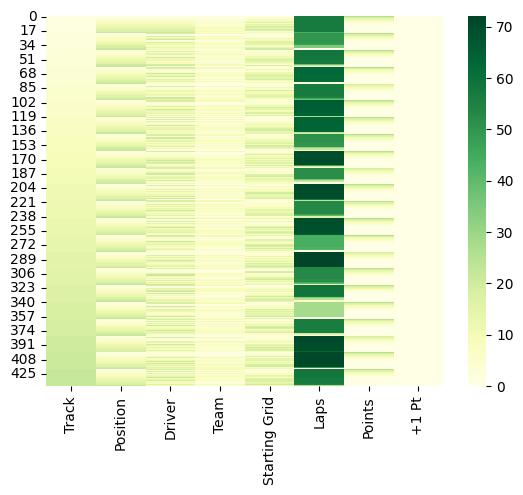

In [44]:
# The heatmap for the correlation plot shows the visual relationship among variables with the most green entires representing the least 
# correlated column and the most light with the most correlated. 

sns.heatmap(race_results, cmap='YlGn')
plt.show()

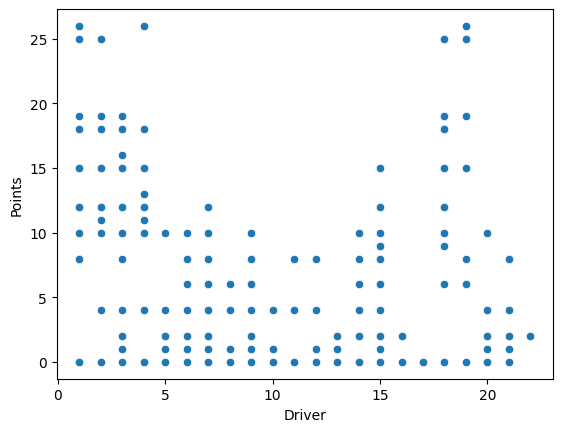

In [45]:
# we make a scatter plot of Drivers againsts Points got during the race; 
# the plot shows that there are extreems with less drivers getting more points than other drive

sns.scatterplot(data = race_results, x='Driver', y='Points')
plt.show()

In [46]:
# Before we make the prediction for this year's Formula One Champion, we need to know who led in points last year for purposes of context
driver_standings = race_results.groupby('Driver', as_index=False)['Points'].sum().sort_values(by='Points', ascending=False)
driver_standings

,Driver,Points
18,19,433
0,1,291
17,18,291
3,4,262
2,3,233
1,2,228
14,15,116
6,7,89
8,9,81
5,6,47


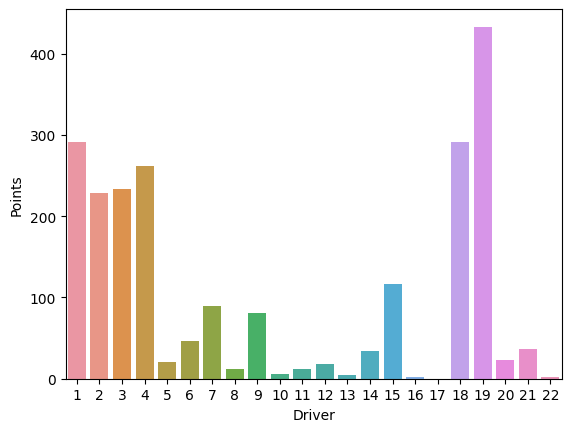

In [47]:
# A visual repourresentation of the driver's performance 

sns.barplot(data=driver_standings, x='Driver', y='Points')
plt.show()

In [48]:
# I have chosen to use the Random Forest Regressor for this problem because of the problem complexity.

# Model definition

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [49]:
# Here i copy the dataframe to ensure I do not tamper with it no more 

df = race_results.copy()

In [50]:
# Now I select the features to use for making the prediction and split them into dependent and independent variables

X = df.drop(['Position'], axis=1)
y = df['Position']

In [51]:
# numpy arrays are multidimentional hence favorable for using as training and testing variables. 

X = np.array(X)
y = np.array(y)

In [52]:
# We check the shape to determing the compatibility 

display(X.shape, y.shape)

(440, 7)

(440,)

In [53]:
# we use the train test split library to split our data into test and train using testsize of 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [54]:
# We fit the model with our objects and create the Random Forest Regressor

model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [55]:
# We check the mae to evaluate our model. It is 0.79 which is a relatively low mean absolute error indicating that our model is suitable for
# making predictions. 

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.7893181818181817

In [56]:
# The r2 score evaluates my models accuracy and returns the results based on the prediction results. 
# I get 92% which indicates a favorable accuracy. 

r2 = r2_score(y_test, y_pred)
r2

0.9284166833668154

In [57]:
# I check the shapes of my test and predicted samples noting that they are compatible

display(y_test.shape, y_pred.shape)

(132,)

(132,)

In [58]:
# This array contains my possible predictions and the test class used to train this model

display(y_test, y_pred)

array([17, 10, 14,  1,  9,  6,  4,  7, 11, 22, 13, 10,  1, 11, 12, 15, 13,
        1, 14, 21, 18,  6,  6,  8, 14,  9, 18, 11, 11, 11, 13,  4,  9,  7,
       22,  6,  4, 22, 17, 13, 19,  9,  9,  3,  2,  3,  3,  4,  2, 21, 14,
       10, 13, 15,  8,  3,  2, 10,  7,  1, 22, 20, 12, 11,  6,  4, 13, 15,
       14,  9, 21,  2,  7, 17, 16, 10,  4, 10,  2,  7,  9, 14,  3, 16, 14,
        2,  4, 15, 19,  3, 10, 10,  5,  5,  1,  6, 11,  7, 18,  7, 10, 14,
       20,  6,  5,  8, 14, 16,  2,  9,  7,  8,  5,  3,  5, 11,  2, 22, 17,
       15,  8,  9, 16, 16,  2, 10,  1, 20,  4, 12, 22,  8])

array([14.29, 10.  , 14.49,  1.  ,  9.  ,  6.  ,  4.01,  7.  , 13.93,
       13.48, 13.7 , 10.  ,  1.  , 14.52, 13.53, 17.4 , 13.44,  1.  ,
       13.75, 18.75, 16.23,  6.  ,  6.  ,  8.  , 18.82,  9.  , 18.65,
       16.25, 14.29, 13.64, 13.66,  4.  ,  9.  ,  7.  , 19.97,  6.  ,
        4.01, 20.75, 15.18, 13.81, 15.42,  9.  ,  9.  ,  3.  ,  2.  ,
        3.  ,  3.  ,  4.01,  2.  , 21.91, 14.59, 10.  , 13.98, 14.25,
        8.  ,  3.  ,  2.  , 10.  ,  7.  ,  1.  , 21.38, 21.81, 13.29,
       14.44,  6.  ,  4.  , 13.63, 14.35, 15.1 ,  9.  , 21.68,  2.  ,
        7.  , 14.85, 18.22, 10.  ,  4.  , 10.  ,  2.  ,  7.  ,  9.  ,
       14.71,  3.  , 15.09, 13.88,  2.  ,  4.01, 13.96, 19.21,  3.  ,
       10.  , 10.  ,  5.  ,  5.  ,  1.  ,  6.  , 13.97,  7.  , 13.87,
        7.  , 10.  , 13.93, 16.25,  6.  ,  4.99,  8.  , 14.58, 16.91,
        2.  ,  9.  ,  7.  ,  8.  ,  5.  ,  3.  ,  5.  , 14.73,  2.  ,
       19.74, 16.07, 14.73,  8.  ,  9.  , 13.35, 16.99,  2.  , 10.  ,
        1.  , 16.  ,

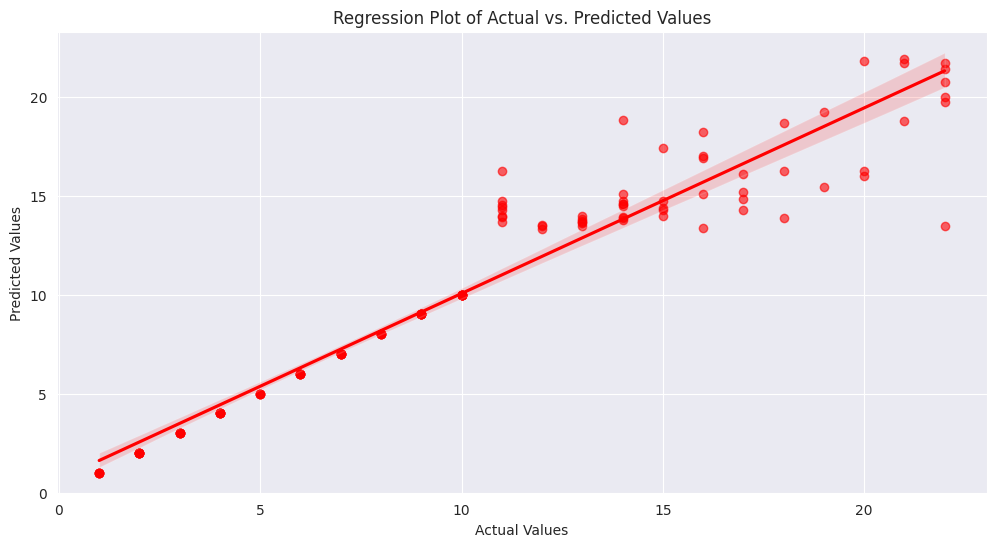

In [59]:
# Before making the prediction, I want to plot my Regressor to visualize test sample against the predicted results

plt.figure(figsize=(12,6))

sns.set_style('darkgrid')
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.6}, color='r')
plt.title('Regression Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [60]:
# I use my model to predict Max Versterppen's position in this year's Dutch Grand Prix basing the variables on his current form derived  from 
# the 2023 f1 results dataset below. __Race_Results.csv__ 


track = 15
team = 10
laps = 72
points = 26
plus1 = 1
starting_grid = 3
driver = 19


# features for the 2023 Dutch Grand Prix
features_2023 = [[track, team, laps, points, plus1, starting_grid, driver]]

# Make predictions for the 2023 Dutch Grand Prix
predicted_performance = model.predict(features_2023)

# Display the predicted performance
print("Predicted Position:", predicted_performance)


Predicted Position: [9.]


In [61]:
races = pd.read_csv(r'/home/jeromemugita/Documents/Code/DataScience/Intermediate DS/Project/Race_Results.csv')
races

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,1:36.156
3,Bahrain,4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,1:37.130
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,1:36.546
...,...,...,...,...,...,...,...,...,...,...,...
235,Belgium,16,3,Daniel Ricciardo,AlphaTauri Honda RBPT,19,44,+103.071,0,No,1:50.994
236,Belgium,17,2,Logan Sargeant,Williams Mercedes,18,44,+104.476,0,No,1:50.486
237,Belgium,18,27,Nico Hulkenberg,Haas Ferrari,20,44,+110.450,0,No,1:49.907
238,Belgium,NC,55,Carlos Sainz,Ferrari,4,23,DNF,0,No,1:53.138


In [63]:
race1 = races[races['Driver'] == 'Max Verstappen']
race1['Starting Grid'].mean()
# race1

3.4166666666666665